# Exploratory Data Analysis (EDA)

During this phase, we examine and understand the structure, content, and characteristics of a dataset. Our goal is to identify patterns, anomalies, relationships, and other key aspects that may influence subsequent analyses or decision-making.

## Objectives of EDA

### 1. Understanding the Dataset
- Load and visualize the dataset to familiarize ourselves with its general characteristics.
- Review the rows to understand its structure.

### 2. Missing Data
- Identify and quantify missing data in the dataset.

### 3. Data Types
- Review the data types of each column.
- Identify potential inconsistencies in data types.

### 4. Data Distribution
- Analyze the distribution of data in each column.
- Use visualizations to understand the shape and spread of the data.

### 5. Correlations and Patterns
- Calculate and visualize correlations between numerical variables.
- Identify potential patterns or relationships between variables.

### 6. Visualizations
- Create charts and diagrams to visualize different aspects of the dataset.

### 7. Evaluating Data Quality
- Assess the overall quality of the dataset, identifying possible errors in the data.
- Propose solutions to improve the dataset's quality if necessary.
- This will be done as the EDA progresses.

## Environment Setup
Ensure your environment variables contain your database credentials (from the `.env` file) and that the necessary packages are installed using:

```bash
pip install -r requirements.txt

---

First, we will load the environment variables from the .env file, which contains important configurations such as paths and credentials. Then, we will obtain the working directory from these variables and add it to the system path to ensure that the project's modules can be imported correctly.

In [3]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()

work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /home/carol/workshop-02


Now, we import the necessary modules and classes for the rest of the notebook.

In [6]:
from db.db_connection import build_engine
from models.model import GrammyAward
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The build_engine function is called to configure and create a connection to the PostgreSQL database.



In [7]:
engine = build_engine()

Successfully connected to the database workshop2!


A SQLAlchemy session is created using the database engine established in the previous step. Why? This session is necessary for performing read and write operations on the database.

In [8]:
Session = sessionmaker(bind=engine)
session = Session()

First, we use declarative_base() to create a base class that SQLAlchemy will use to manage the database tables and classes. This base class serves as a starting point for defining the tables and their mappings. We use aliased() to create an alias of the Candidates table.

In [9]:
base = declarative_base()
table = aliased(GrammyAward)

A SQL query is performed on the Grammy Awards table and the result is converted to a pandas DataFrame.

In [10]:
query = session.query(table).statement
df = pd.read_sql(query, engine)

The Grammy Awards dataset has **4810 rows** and **11 columns.**

In [11]:
df.shape

(4810, 11)

The columns provided initially are:

## Dataset Columns 📊

1. **ID**: A unique identifier. 🆔
2. **year**: The year in which the GRAMMY ceremony was held for which the data is recorded. 📅
3. **title**: The title of the GRAMMY ceremony for the corresponding year. 🏆
4. **published_at**: The date and time when information about the ceremony or results was published in the database. It is in a date and time format with a time zone. ⏰
5. **updated_at**: The date and time when the information was last updated in the database. Also in a date and time format with a time zone. 🔄
6. **category**: The category of the GRAMMY award. 🎶
7. **nominee**: The name of the song, album, individual, etc., nominated for the award in that category. 🎤
8. **artist**: The name of the artist. 🎨
9. **workers**: The production team members who contributed to the nominated work. 👥
10. **img**: A link to an image associated with the nominee. 🖼️
11. **winner**: A boolean value (True/False) indicating whether the mentioned work won the award in that category. 🏅


In [10]:
df.columns

Index(['ID', 'year', 'title', 'published_at', 'updated_at', 'category',
       'nominee', 'artist', 'workers', 'img', 'winner'],
      dtype='object')

There are columns that are not actually of our interest, such as **published_at** and **updated_at**. Additionally, the links in the img column do not work (and I also do not intend to use images). We can remove them:

In [12]:
df = df.drop(columns=['published_at', 'updated_at', 'img'])

First look at our dataset:

In [16]:
df.head()

,ID,year,title,category,nominee,artist,workers,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,5,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


There are no duplicates:

In [17]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


## Data missing

Let’s check for any null values:

In [18]:
missing_data = df.isna().sum()
missing_data

ID             0
year           0
title          0
category       0
nominee        6
artist      1840
workers     2190
winner         0
dtype: int64

The 6 null values in the nominee column lack the artist and workers columns. We know very little about these nominees.

In [19]:
df[df['nominee'].isna()]

,ID,year,title,category,nominee,artist,workers,winner
2282,2262,2000,43rd Annual GRAMMY Awards (2000),"Remixer of the Year, Non-Classical",None,None,None,True
2377,2360,1999,42nd Annual GRAMMY Awards (1999),"Remixer Of The Year, Non-Classical",None,None,None,True
2473,2455,1998,41st Annual GRAMMY Awards (1998),"Remixer Of The Year, Non-classical",None,None,None,True
2569,2548,1997,40th Annual GRAMMY Awards (1997),"Remixer Of The Year, Non-Classical",None,None,None,True
4526,4526,1965,8th Annual GRAMMY Awards (1965),Best New Country & Western Artist,None,None,None,True
4574,4574,1964,7th Annual GRAMMY Awards (1964),Best New Country & Western Artist Of 1964,None,None,None,True


We can remove these 6 records.

In [20]:
df = df.dropna(subset=['nominee'])

Now, let's check the remaining null values and see which categories they belong to:

In [21]:
df_nulls = df[df['artist'].isna() | df['workers'].isna()]

nulls_by_category = df_nulls.groupby('category').agg(
    nulls_artist=('artist', lambda x: x.isna().sum()),
    nulls_workers=('workers', lambda x: x.isna().sum())
)

nulls_by_category['total_null'] = nulls_by_category['nulls_artist'] + nulls_by_category['nulls_workers']
sorted_nulls = nulls_by_category.sort_values(by='total_null', ascending=False)

sorted_nulls


,nulls_artist,nulls_workers,total_null
category,,,
Best New Artist,50,51,101
Song Of The Year,70,0,70
Best Opera Recording,64,0,64
Best Album Notes,63,0,63
Best Instrumental Composition,55,0,55
...,...,...,...
Best Pop Vocal Performance By A Group,0,1,1
Best Dance Recording,0,1,1
"Best Country Vocal Solo Performance, Male",0,1,1


The categories with nulls, such as **Best New Artist** and **Song Of The Year**, reflect specific award criteria that may lead to empty counts. For example, in Best New Artist, nulls may occur because the artist is already recognized in nominee. In Song Of The Year, the focus is on both the song and its workers, which may result in nulls for specific artists, as the attention is directed towards the collective.

Although we already know that there are nulls in certain columns depending on the category, we can extract the artist from the workers column, as that information is found within parentheses. We need this because we will perform a merge, and we need the artist data for merging with the Spotify dataset:

In [22]:
df[df['nominee']=='Lover']

,ID,year,title,category,nominee,artist,workers,winner
21,21,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lover,None,"Taylor Swift, songwriter (Taylor Swift)",True
53,52,2019,62nd Annual GRAMMY Awards (2019),Best Pop Vocal Album,Lover,Taylor Swift,None,True


This code allows us to extract what is within parentheses in the workers column:

In [23]:
extracted_artists = df['workers'].str.extract(r'\(([^)]+)\)', expand=False)
df['artist'] = df['artist'].fillna(extracted_artists)

Additionally, our dataset already contains artists whose names are within parentheses.


In [24]:
df[df['artist'].str.contains('\(', na=False)].head(10)

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_3898/84103160.py:1: SyntaxWarning: invalid escape sequence '\('
  df[df['artist'].str.contains('\(', na=False)].head(10)


,ID,year,title,category,nominee,artist,workers,winner
214,212,2019,62nd Annual GRAMMY Awards (2019),Best Roots Gospel Album,"Gonna Sing, Gonna Shout",(Various Artists),"Jerry Salley, Producer",True
276,272,2019,62nd Annual GRAMMY Awards (2019),Best Regional Roots Music Album,Hawaiian Lullaby,(Various Artists),"Imua Garza & Kimié Miner, producers",True
293,289,2019,62nd Annual GRAMMY Awards (2019),"Best Spoken Word Album (Includes Poetry, Audio...",Beastie Boys Book,(Various Artists),"Michael Diamond, Adam Horovitz, Scott Sherratt...",True
296,292,2019,62nd Annual GRAMMY Awards (2019),"Best Spoken Word Album (Includes Poetry, Audio...",Sekou Andrews & The String Theory,Sekou Andrews (& The String Theory),None,True
308,304,2019,62nd Annual GRAMMY Awards (2019),Best Compilation Soundtrack For Visual Media,The Lion King: The Songs,(Various Artists),"Jon Favreau & Hans Zimmer, compilation producers",True
309,305,2019,62nd Annual GRAMMY Awards (2019),Best Compilation Soundtrack For Visual Media,Quentin Tarantino's Once Upon A Time In Hollywood,(Various Artists),"Quentin Tarantino, compilation producer; Mary ...",True
311,307,2019,62nd Annual GRAMMY Awards (2019),Best Compilation Soundtrack For Visual Media,Spider-Man: Into The Spider-Verse,(Various Artists),"Spring Aspers & Dana Sano, compilation produce...",True
434,431,2019,62nd Annual GRAMMY Awards (2019),Best Music Film,Birth Of The Cool,(Miles Davis),"Stanley Nelson, video director; Nicole London,...",True
435,432,2019,62nd Annual GRAMMY Awards (2019),Best Music Film,Shangri-La,(Various Artists),"Jeff Malmberg & Morgan Neville, video director...",True
498,494,2018,61st Annual GRAMMY Awards (2018),Best Compilation Soundtrack For Visual Media,The Greatest Showman,Hugh Jackman (& Various Artists),"Alex Lacamoire, Benj Pasek, Justin Paul & Greg...",True


We will remove them:

In [25]:
df['artist'] = df['artist'].str.replace(r'\(|\)', '', regex=True)

## Data type

### Quantitative Data
Numerical values that can be measured and analyzed statistically.
- **year**: int64

### Qualitative Data
Descriptive data that represent categories or characteristics.
- **title**: object
- **published_at**: object
- **updated_at**: object
- **category**: object
- **nominee**: object
- **artist**: object
- **workers**: object
- **winner**: bool

In [26]:
df.dtypes

ID           int64
year         int64
title       object
category    object
nominee     object
artist      object
workers     object
winner        bool
dtype: object

Let’s ensure that the text strings are in the same format:

In [27]:
df.loc[:, 'title'] = df['title'].str.title().str.strip()
df.loc[:, 'category'] = df['category'].str.title().str.strip()
df.loc[:, 'nominee'] = df['nominee'].str.title().str.strip()
df.loc[:, 'artist'] = df['artist'].str.title().str.strip()
df.loc[:, 'workers'] = df['workers'].str.title().str.strip()

## Data Distribution

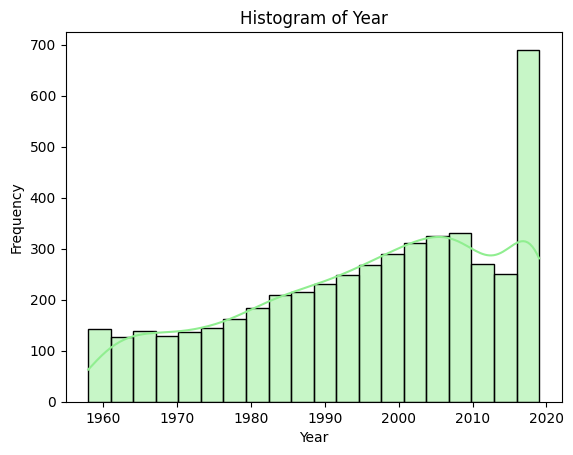

In [24]:
sns.histplot(df['year'], kde=True, bins=20,color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year')
plt.show()
    

Shows the distribution of data across different years from 1960 to 2020. The frequency increases gradually from 1960 to around 2010, indicating a steady growth in the data points over the years. There is a notable peak around 2020, where the frequency significantly jumps, suggesting a sudden increase in data points for that year. 

### Outliers

There are no outliers:

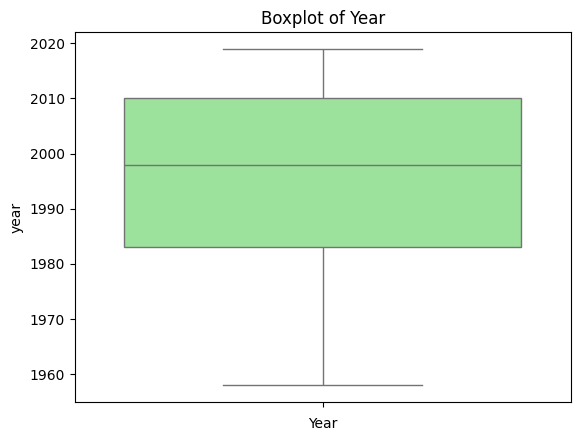

In [25]:
sns.boxplot(y=df['year'], color='lightgreen')
plt.xlabel('Year')
plt.title('Boxplot of Year')
plt.show()

## Data Patterns

In this case, we will examine the 10 most frequent data points:

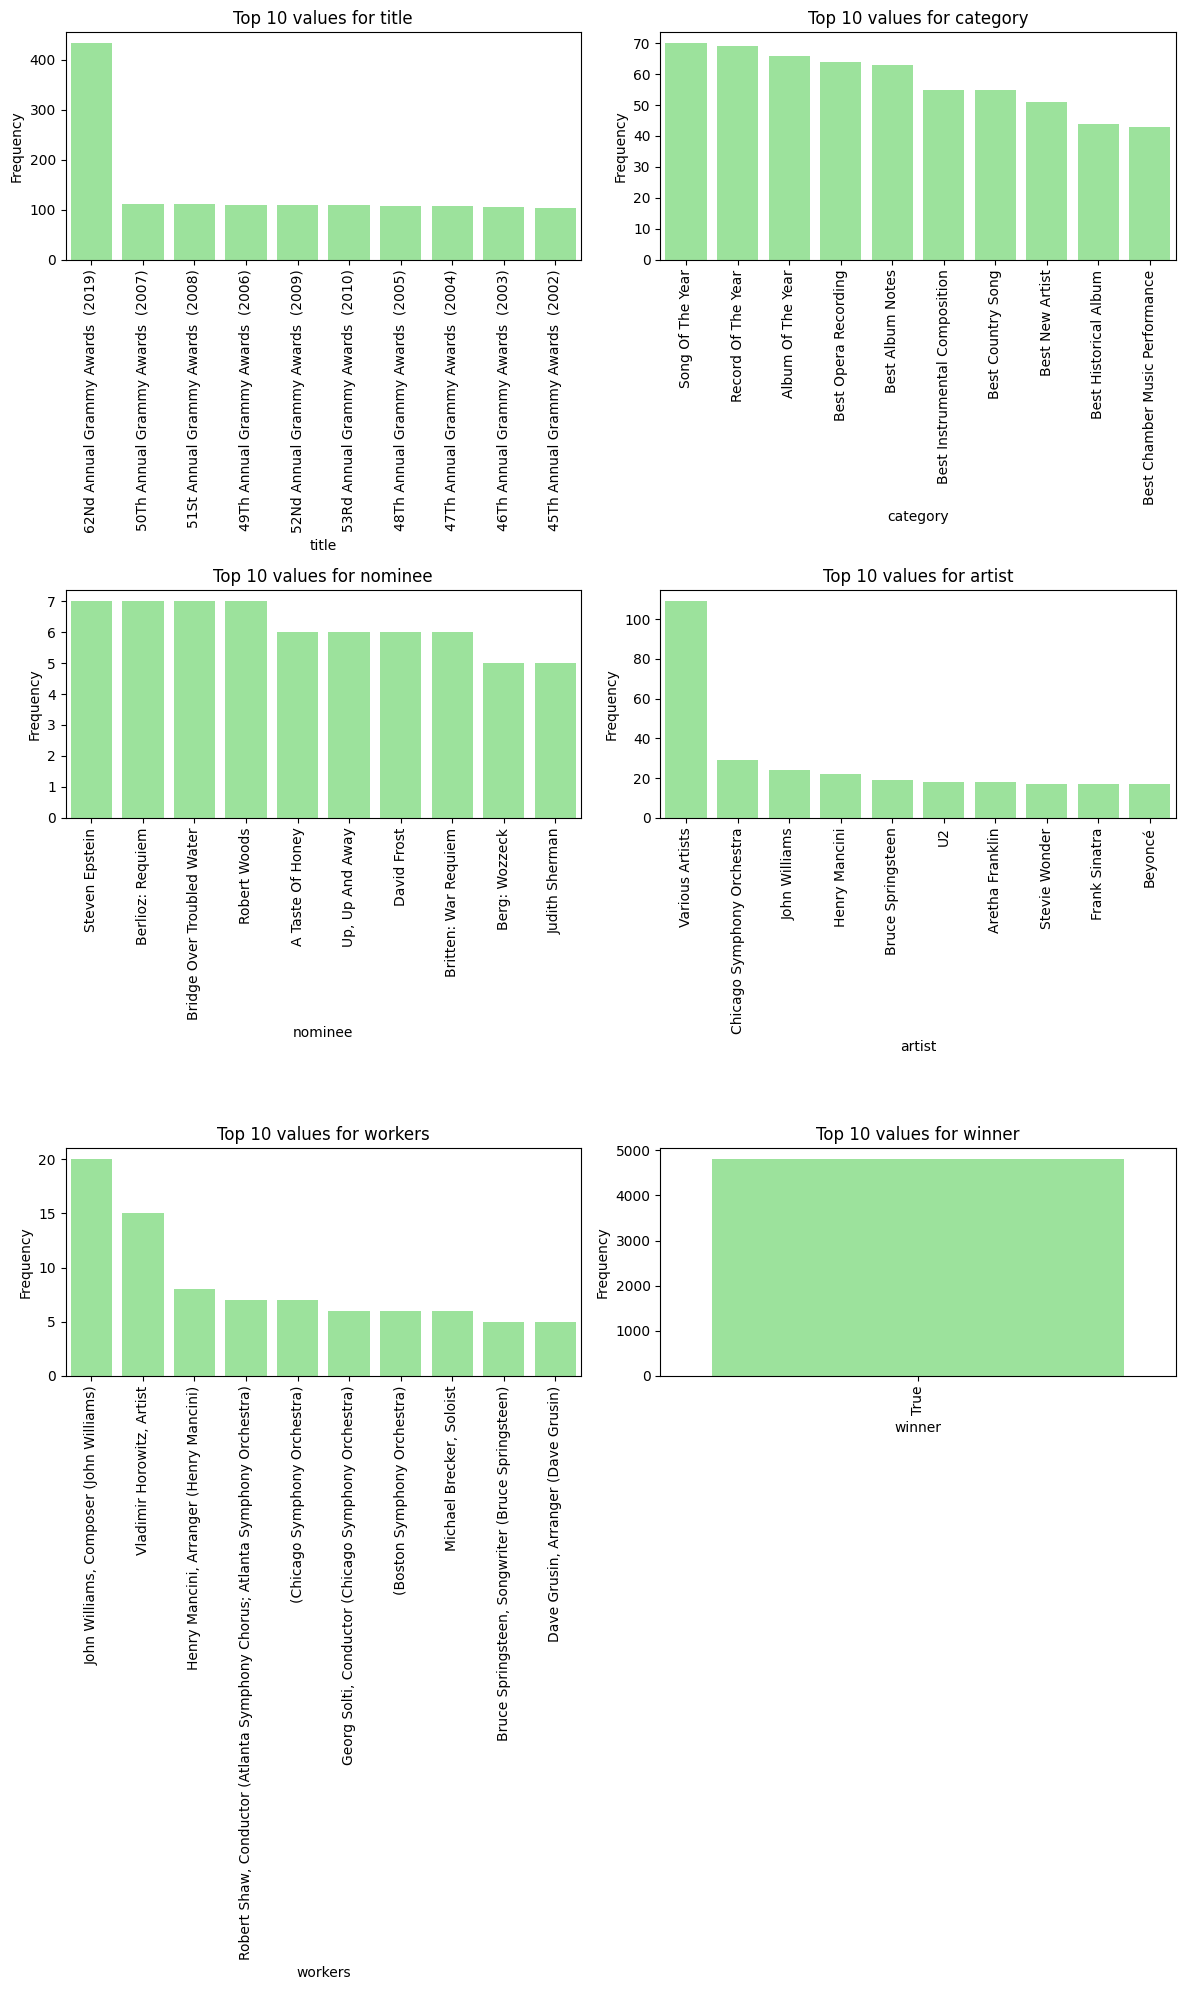

In [26]:
qualitative = df.select_dtypes(include=['object', 'bool']).columns
qualitative = qualitative[qualitative != 'img']

fig, axes = plt.subplots(3, 2, figsize=(12, 20))
axes = axes.flatten()

for i, col in enumerate(qualitative):
    top_counts = df[col].value_counts().head(10)

    top_df = pd.DataFrame({'Value': top_counts.index, 'Frequency': top_counts.values})
    
    sns.barplot(x='Value', y='Frequency', data=top_df, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Top 10 values for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()

The winner column only contains True values, indicating an error. There are several records for the same category in the same year. We know that ties can occur between two nominees, but in this case, it seems that the first record is the winner and the others are the nominees. We can confirm this on the official GRAMMY website.

In [28]:
df[df['year']==2019]

,ID,year,title,category,nominee,artist,workers,winner
0,1,2019,62Nd Annual Grammy Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, Producer; Rob Kinelski & Fi...",True
1,2,2019,62Nd Annual Grammy Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"Bj Burton, Brad Cook, Chris Messina & Justin V...",True
2,3,2019,62Nd Annual Grammy Awards (2019),Record Of The Year,7 Rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,4,2019,62Nd Annual Grammy Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, Producer; Joseph H...",True
4,5,2019,62Nd Annual Grammy Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, Producers; Ingmar C...",True
...,...,...,...,...,...,...,...,...
432,429,2019,62Nd Annual Grammy Awards (2019),Best Music Film,Homecoming,Beyoncé,"Beyoncé Knowles-Carter & Ed Burke, Video Direc...",True
433,430,2019,62Nd Annual Grammy Awards (2019),Best Music Film,Remember My Name,David Crosby,"A.J. Eaton, Video Director; Cameron Crowe, Mic...",True
434,431,2019,62Nd Annual Grammy Awards (2019),Best Music Film,Birth Of The Cool,Miles Davis,"Stanley Nelson, Video Director; Nicole London,...",True
435,432,2019,62Nd Annual Grammy Awards (2019),Best Music Film,Shangri-La,Various Artists,"Jeff Malmberg & Morgan Neville, Video Director...",True


Considering this, let’s transform those who were not winners:

In [29]:
grouped = df.groupby(['year', 'title', 'category'])

for name, group in grouped:
    if len(group) > 2:
        df.loc[group.index[0], 'winner'] = True
        df.loc[group.index[1:], 'winner'] = False

Now, we see that there are actually 7.3% of nominees who were not winners:

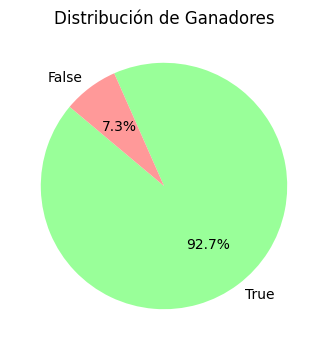

In [29]:
counts = df['winner'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#99FF99', '#FF9999'])
plt.title('Distribución de Ganadores')
plt.show()

However, for our analysis, we are only interested in the winners, so let's remove those who were not winners.

In [30]:
df = df[df['winner']== True]
df = df.reset_index(drop=True)

## Data Visualization

Let’s see how many awards have been given out over the years:

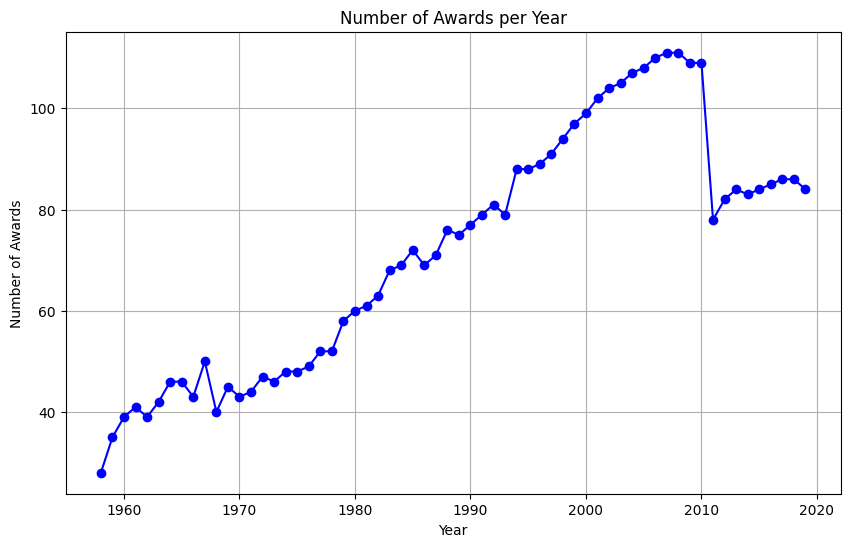

In [31]:
num_awards_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(num_awards_per_year.index, num_awards_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Number of Awards')
plt.title('Number of Awards per Year')
plt.grid(True)

plt.show()

- From 1958 to 2010, there was a significant increase, reaching over 100 awards given. After that year, there was a sudden decrease to just 79.

Now, let’s check which categories had the most winners:

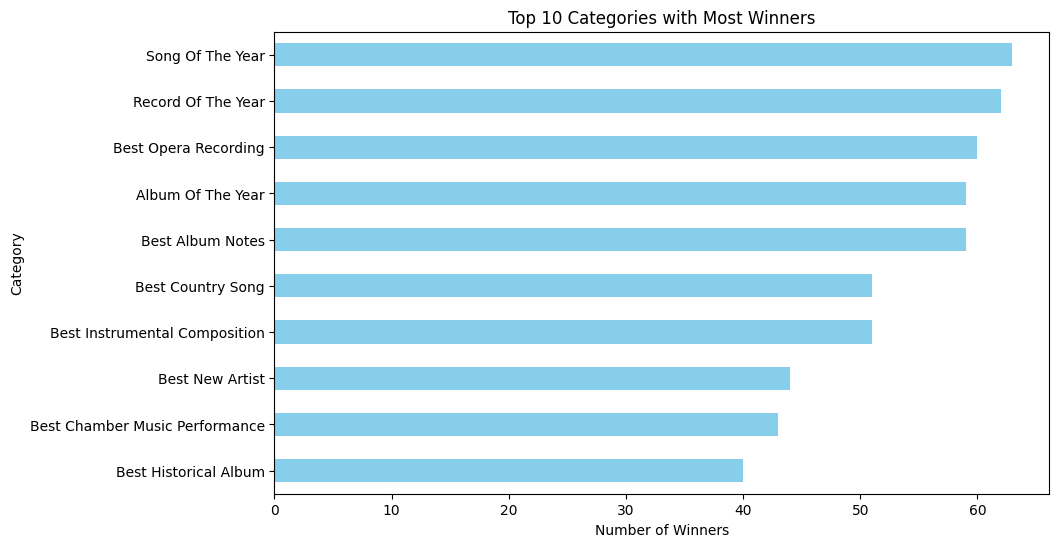

In [32]:
winners_df = df[df['winner'] == True]
top_categories_winners = winners_df['category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_categories_winners.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Winners')
plt.ylabel('Category')
plt.title('Top 10 Categories with Most Winners')
plt.gca().invert_yaxis()

plt.show()

- Song of the Year takes the first place, with approximately 63 winners. Following this are Record of the Year and Best Opera Recording.

Let’s see which artists have won the most awards:

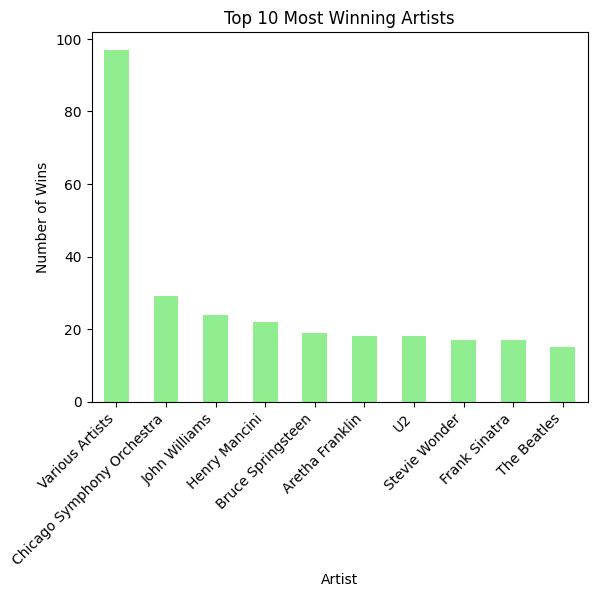

In [31]:
top_artists = df['artist'].value_counts().head(10)
top_artists.plot(kind='bar', color='lightgreen')
plt.xlabel('Artist')
plt.ylabel('Number of Wins')
plt.title('Top 10 Most Winning Artists')
plt.xticks(rotation=45, ha='right')
plt.show()

- In first place are the awards for Various Artists, but if we set that aside, the Chicago Symphony Orchestra takes the top spot with approximately 30 awards. Following them are John Williams and Henry Mancini.

And finally, let’s look at which categories have had the most ties:

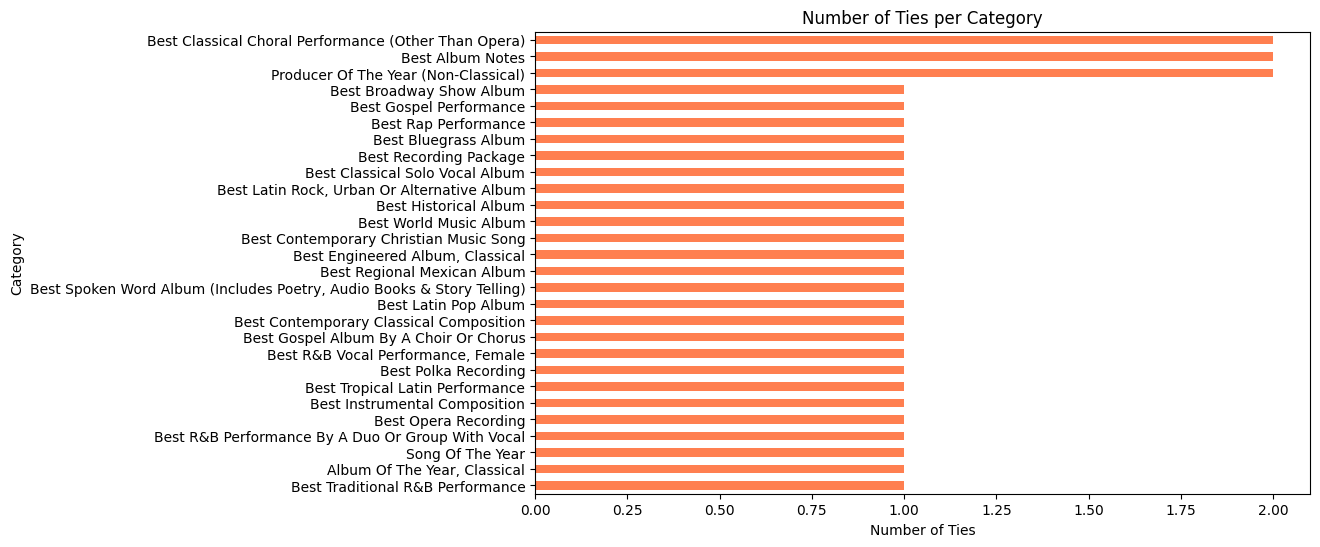

In [34]:
winner_count = df[df['winner']].groupby(['category', 'year']).size()
tie_results = winner_count[winner_count == 2].index 
df_tie_results = df[(df.set_index(['category', 'year']).index.isin(tie_results)) & (df['winner'] == True)].sort_values(by='year')
ties_per_category = df_tie_results['category'].value_counts() / 2

plt.figure(figsize=(10, 6))
ties_per_category.plot(kind='barh', color='coral')

plt.xlabel('Number of Ties')
plt.ylabel('Category')
plt.title('Number of Ties per Category')
plt.gca().invert_yaxis()  

plt.show()

- The categories with the most ties have been Best Classical Choral Performance, Best Album Notes, and Producer of the Year, each having experienced two ties.